Load the Data

In [6]:
import json
import pandas as pd

with open('data/preprocessed/articles_preprocessed.json', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

## Sentiment Distribution

The chart below shows the distribution of article sentiments (negative, positive, neutral) in the dataset. This visualization helps to quickly understand the overall tone of the collected articles.

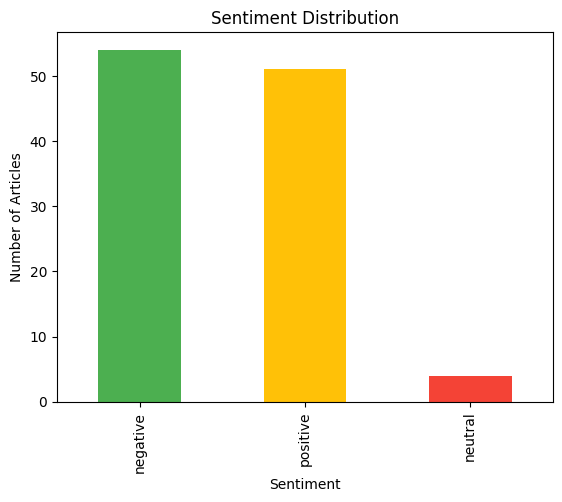

In [7]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

## Articles per Source

The horizontal bar chart below displays the top 10 sources by article count in the dataset. This visualization highlights which media outlets contribute the most articles, helping to identify the most prominent sources in the collection.

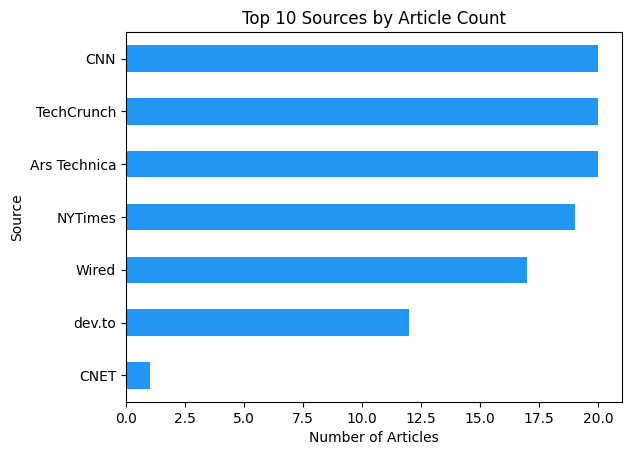

In [8]:
source_counts = df['source'].value_counts().head(10)
source_counts.plot(kind='barh', color='#2196F3')
plt.title('Top 10 Sources by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Source')
plt.gca().invert_yaxis()
plt.show()

## Articles Over Time

The line chart below visualizes the number of articles published each day. The `date` column was converted from milliseconds to datetime format, and articles are grouped by day using resampling. This helps identify trends and spikes in article publication over time.

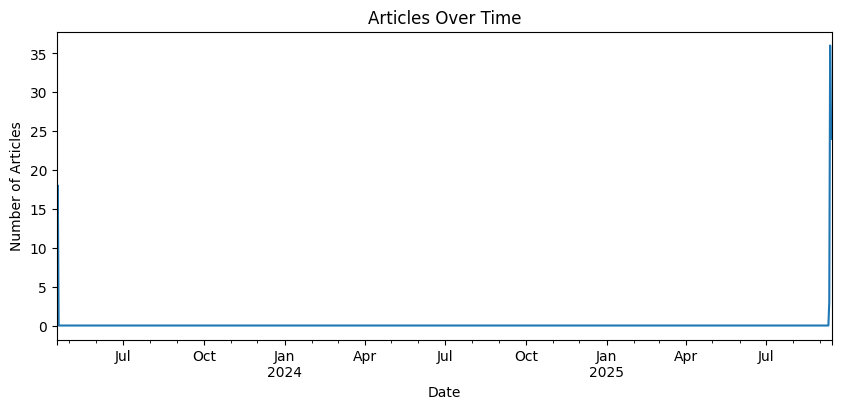

In [9]:
df['date'] = pd.to_datetime(df['date'], unit='ms')
df.set_index('date').resample('D').size().plot(figsize=(10,4))
plt.title('Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

## Sentiment by Source (Top 5)

The stacked bar chart below shows the distribution of article sentiments (negative, positive, neutral) for the top 5 sources in the dataset. Each bar represents a source, and the segments within each bar indicate the number of articles with each sentiment. This visualization helps compare how different media outlets report on topics with varying tones.

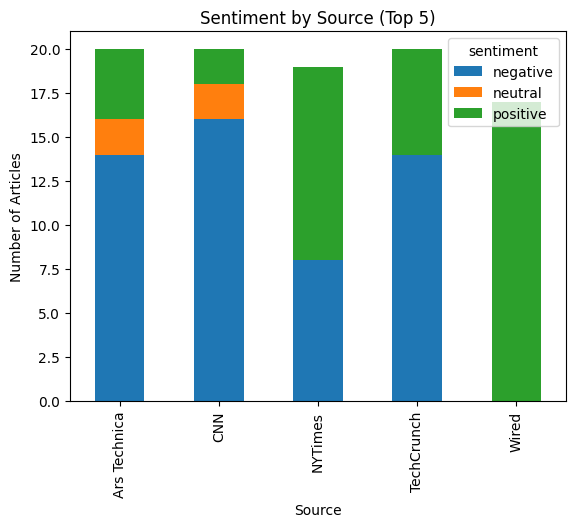

In [10]:
top_sources = df['source'].value_counts().head(5).index
df_top = df[df['source'].isin(top_sources)]
pd.crosstab(df_top['source'], df_top['sentiment']).plot(kind='bar', stacked=True)
plt.title('Sentiment by Source (Top 5)')
plt.xlabel('Source')
plt.ylabel('Number of Articles')
plt.show()